In [1]:
!bash /home/azureuser/cloudfiles/code/blobfuse/blobfuse_raadsinformatie.sh

In [2]:
import sys
sys.path.append("..")

# Select where to run notebook: "azure" or "local"
my_run = "azure"

# import my_secrets as sc
# import settings as st

if my_run == "azure":
    import config_azure as cf
elif my_run == "local":
    import config as cf


import os
if my_run == "azure":
    if not os.path.exists(cf.HUGGING_CACHE):
        os.mkdir(cf.HUGGING_CACHE)
    os.environ["TRANSFORMERS_CACHE"] = cf.HUGGING_CACHE

import pandas as pd

## Notebook overview

*Previous notebook: baseline*

*Next notebook: none, last notebook*

### Fine-tuning Experiments
- Accuracy scores for each model, and epoch
- Runtime per doc for each model, and 

In [3]:
def average_runtime_per_doc(runtime):
    return round(runtime/1100)

In [79]:

# incontext learing -> training on 0 epochs is the same as incontext learning
epoch0_g = pd.read_pickle(f"{cf.output_path}/predictionsFinal/in_context/GEITje/overview.pkl")
epoch0_g = epoch0_g.loc[epoch0_g['run_id']=='IC_GEITje-7B-chat-v2zeroshot_prompt_geitjeLlamaTokens200_0traintest_numEx0']
epoch0_l = pd.read_pickle(f"{cf.output_path}/predictionsFinal/in_context/Llama/overview.pkl")
epoch0_l = epoch0_l.loc[epoch0_l['run_id']=='IC_Llama-2-7b-chat-hfzeroshot_prompt_mistral_llamaLlamaTokens200_0traintest_numEx0']
epoch0_m = pd.read_pickle(f"{cf.output_path}/predictionsFinal/in_context/Mistral/overview.pkl")
epoch0_m = epoch0_m.loc[epoch0_m['run_id']=='IC_Mistral-7B-Instruct-v0.2zeroshot_prompt_mistral_llamaLlamaTokens200_0traintest_numEx0']
epoch0 = pd.concat([epoch0_g, epoch0_l, epoch0_m])
epoch0['base_model'] = ['GEITje', 'Llama', 'Mistral']
epoch0['epoch'] = 0

#fine-tuning
epoch1 = pd.read_pickle(f"{cf.output_path}/predictionsFinal/finetuning/1epochs/overview.pkl")
epoch1['base_model'] = ['Mistral', 'GEITje', 'Llama']
epoch1['epoch'] = 1
epoch2 = pd.read_pickle(f"{cf.output_path}/predictionsFinal/finetuning/2epochs/overview.pkl")
epoch2 = epoch2.drop(index=3)
epoch2['epoch'] = 2
epoch2['base_model'] = ['GEITje', 'Llama', 'Mistral']
epoch3 = pd.read_pickle(f"{cf.output_path}/predictionsFinal/finetuning/3epochs/overview.pkl")
epoch3 = epoch3.drop(index=3)
epoch3['base_model'] = ['Llama', 'Mistral', 'GEITje']
epoch3['epoch'] = 3

overview = pd.concat([epoch0, epoch1, epoch2, epoch3])
overview['runtime_per_doc'] = overview['runtime'].apply(average_runtime_per_doc)
# display(overview)

# geitje_overview = overview.

In [80]:
display(epoch0)

,model,run_id,date,train_set,test_set,train_set_support,test_set_support,split_col,text_col,runtime,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1,classification_report,weighted_avg_precision,weighted_avg_recall,weighted_avg_f1,base_model,epoch
0,GEITje-7B-chat-v2,IC_GEITje-7B-chat-v2zeroshot_prompt_geitjeLlam...,2024-05-18 17:06:17.572635+02:00,train,test,9900,1100,balanced_split,TruncationLlamaTokensFront200Back0,36118.340253,0.654545,0.598731,0.514286,0.518449,precision ...,0.762021,0.654545,0.659844,GEITje,0
0,Llama-2-7b-chat-hf,IC_Llama-2-7b-chat-hfzeroshot_prompt_mistral_l...,2024-05-26 21:20:27.966620+02:00,train,test,9900,1100,balanced_split,TruncationLlamaTokensFront200Back0,132040.014386,0.474545,0.537874,0.372857,0.349950,precision ...,0.684567,0.474545,0.445390,Llama,0
0,Mistral-7B-Instruct-v0.2,IC_Mistral-7B-Instruct-v0.2zeroshot_prompt_mis...,2024-05-19 22:25:36.729863+02:00,train,test,9900,1100,balanced_split,TruncationLlamaTokensFront200Back0,65826.893171,0.582727,0.535020,0.427333,0.436290,precision...,0.729573,0.582727,0.594941,Mistral,0


GEITje
Llama
Mistral


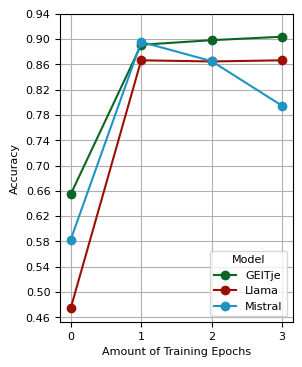

In [81]:
import matplotlib.pyplot as plt

# colors = ['#0099B4B2', '#AA4499', '#7AD151FF']
# colors = ['#9B1003', '#7AD151FF',  '#0099B4B2']
colors = ['#2093c3', '#FCD12A',  '#9B1003']
colors = ['#0B6623', '#9B1003',  '#2093c3']

plt.figure(figsize=(3, 4))
df = overview.copy()
# Loop through each model and plot
for idx, model in enumerate(df['base_model'].unique()):
    print(model)
    model_df = df[df['base_model'] == model]
    plt.plot(model_df['epoch'], model_df['accuracy'], marker='o', label=model, color=colors[idx % len(colors)])

    # for i, acc in enumerate(model_df['accuracy']):
    #     plt.text(model_df['epoch'].iloc[i], acc, f'{acc:.3f}', ha='center', va='bottom')


fs = 8
plt.xticks([0,1, 2, 3],fontsize=fs)
steps = [round(0.46 + i * 0.04, 2) for i in range(int((0.92 - 0.44) / 0.04) + 1)]
plt.yticks(steps, fontsize=fs)
plt.xlabel('Amount of Training Epochs', fontsize=fs)
plt.ylabel('Accuracy', fontsize=fs)
# plt.title('Model Accuracy Over Epochs')
plt.legend(title='Model', fontsize=fs, title_fontsize=fs)
plt.rc('legend', fontsize=fs)

plt.grid(True)
plt.show()

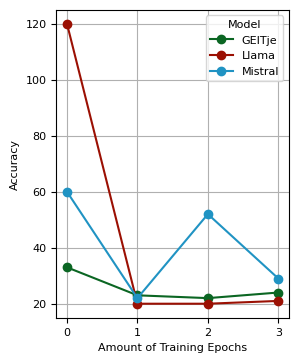

In [82]:
import matplotlib.pyplot as plt

# colors = ['#0099B4B2', '#AA4499', '#7AD151FF']
# colors = ['#0099B4B2', '#9B1003', '#7AD151FF']
colors = ['#2093c3', '#FCD12A',  '#9B1003']
colors = ['#0B6623', '#9B1003',  '#2093c3']



plt.figure(figsize=(3, 4))
df = overview.copy()
# Loop through each model and plot
for idx, model in enumerate(df['base_model'].unique()):
    model_df = df[df['base_model'] == model]
    plt.plot(model_df['epoch'], model_df['runtime_per_doc'], marker='o', label=model, color=colors[idx % len(colors)])

    # for i, rt in enumerate(model_df['runtime_per_doc']):
    #     plt.text(model_df['epoch'].iloc[i], rt, f'{rt}', ha='center', va='bottom')


fs = 8
plt.xticks([0,1, 2, 3],fontsize=fs)
steps = [round(20 + i * 20, 2) for i in range(int((120 - 20) / 20) + 1)]
plt.yticks(steps, fontsize=fs)
plt.xlabel('Amount of Training Epochs', fontsize=fs)
plt.ylabel('Accuracy', fontsize=fs)
# plt.title('Model Accuracy Over Epochs')
plt.legend(title='Model', fontsize=fs, title_fontsize=fs)
plt.rc('legend', fontsize=fs)

plt.grid(True)
plt.show()
